In [1]:
import pandas as pd

In [2]:
datas=pd.read_csv("insurance_pre.csv")

In [3]:
datas

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
datas=pd.get_dummies(datas)

In [5]:
datas

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0
1334,18,31.920,0,2205.98080,1,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0


In [6]:
datas.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes'],
      dtype='object')

In [7]:
independent=datas[['age', 'bmi', 'children','sex_female', 'sex_male',
       'smoker_no', 'smoker_yes']]

In [8]:
dependent=datas[['charges']]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={'criterion':['mse','mae','friedman_mse'],'max_features':['auto','sqrt','log2'],'splitter':['best','random']}
grid=GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)

#criterion='mae',max_features='log2',splitter='random'
grid.fit(x_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   22.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             p

In [18]:
re=grid.cv_results_
print("The R_SCORE value for best parameter{}:".format(grid.best_params_),r_score)

The R_SCORE value for best parameter{'criterion': 'mse', 'max_features': 'sqrt', 'splitter': 'best'}: 0.7506093884369667


In [19]:
table=pd.DataFrame.from_dict(re)

In [20]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009604,0.000522,0.004655,4.701341e-04,mse,auto,best,"{'criterion': 'mse', 'max_features': 'auto', '...",0.576875,0.697167,0.629837,0.634626,0.049225,9
1,0.010970,0.002155,0.005550,1.019993e-03,mse,auto,random,"{'criterion': 'mse', 'max_features': 'auto', '...",0.663467,0.626017,0.625563,0.638349,0.017762,8
2,0.008764,0.000868,0.004202,5.760031e-04,mse,sqrt,best,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.656344,0.693775,0.666879,0.672333,0.015760,1
3,0.007979,0.001410,0.006103,2.100624e-03,mse,sqrt,random,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.594519,0.547704,0.645748,0.595990,0.040040,13
4,0.020127,0.008171,0.004654,4.699655e-04,mse,log2,best,"{'criterion': 'mse', 'max_features': 'log2', '...",0.647030,0.633006,0.672689,0.650908,0.016431,4
5,0.007979,0.001410,0.004322,4.701341e-04,mse,log2,random,"{'criterion': 'mse', 'max_features': 'log2', '...",0.683918,0.633760,0.532290,0.616656,0.063072,11
6,0.059408,0.014899,0.004319,4.724013e-04,mae,auto,best,"{'criterion': 'mae', 'max_features': 'auto', '...",0.633048,0.623296,0.670405,0.642250,0.020303,6
7,0.039653,0.006418,0.012542,1.087885e-02,mae,auto,random,"{'criterion': 'mae', 'max_features': 'auto', '...",0.666152,0.662659,0.634882,0.654564,0.013990,3
8,0.030974,0.006963,0.004574,4.247580e-04,mae,sqrt,best,"{'criterion': 'mae', 'max_features': 'sqrt', '...",0.681702,0.418153,0.508202,0.536019,0.109376,18
9,0.022941,0.007097,0.004655,4.745263e-04,mae,sqrt,random,"{'criterion': 'mae', 'max_features': 'sqrt', '...",0.633240,0.491515,0.580110,0.568288,0.058460,15


In [ ]:
age_input=float(input("Age:"))
bmi_input=float(input("BMI:"))
children_input=float(input("Children:"))
sex_male_input=int(input("sex Male 0 or 1:"))
smoker_yes_input=int(input("smoker Yes 0 or 1:"))

In [ ]:
Future_Prediction=grid.predict([[age_input,bmi_input,children_input,sex_male_input,smoker_yes_input]])
print("Future_Prediction={}".format(Future_Prediction))

AttributeError: 'GridSearchCV' object has no attribute 'tree_'

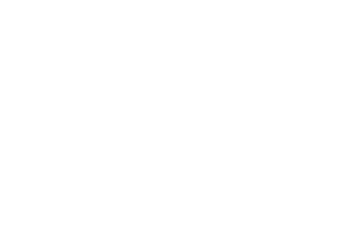

In [14]:
import matplotlib.pyplot as pl
from sklearn import tree
tree.plot_tree(grid)
pl.show()

In [16]:
y_pred=grid.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)
r_score

0.7506093884369667